In [1]:
from IPython.display import display_html
import os
from matplotlib import pyplot as plt, image as img
from matplotlib.animation import FuncAnimation

In [2]:
acc_loss = []
confusion = []
roc = []
sample_data = []
for i in range(2,11):
    if not os.path.isdir(f'outputs/output_{2**i}_{2**i}'):
        continue
    if not os.path.isfile(f'outputs/output_{2**i}_{2**i}/accuracy_loss.png'):
        continue
    acc_loss.append( img.imread(f'outputs/output_{2**i}_{2**i}/accuracy_loss.png') )
    confusion.append( img.imread(f'outputs/output_{2**i}_{2**i}/confusion_matrix.png') )
    roc.append( img.imread(f'outputs/output_{2**i}_{2**i}/roc_curve.png') )
    sample_data.append(img.imread(f'outputs/output_{2**i}_{2**i}/sample_data.png'))

In [3]:
fig, axes = plt.subplot_mosaic( [[0,1],[2,3]] )
[ (ax.get_xaxis().set_visible(False),ax.get_yaxis().set_visible(False)) for ax in axes.values() ]
[ s.set_visible(False) for ax in axes.values() for s in ax.spines.values() ]

def init(i):
    a = axes[0].imshow(acc_loss[i])
    b = axes[1].imshow(confusion[i])
    c = axes[2].imshow(roc[i])
    d = axes[3].imshow(sample_data[i])
    return [a,b,c,d]
plots = init(0)
plt.tight_layout()
def update(event):
    global plots
    global acc_loss
    global confusion
    global roc
    global sample_data
    global fig
    i = event
    fig.suptitle(f'Output_{2**(i+2)}_{2**(i+2)}')
    plots = init(i)
    fig.canvas.draw()
    return plots
ani = FuncAnimation(fig, update, frames=range(len(acc_loss)), repeat=True, interval=1000)
js_html = ani.to_jshtml()
plt.close(fig)

display_html(js_html, raw=True)

Once 
 
 Loop 
 
 Reflect

Computing ECT for whatever
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


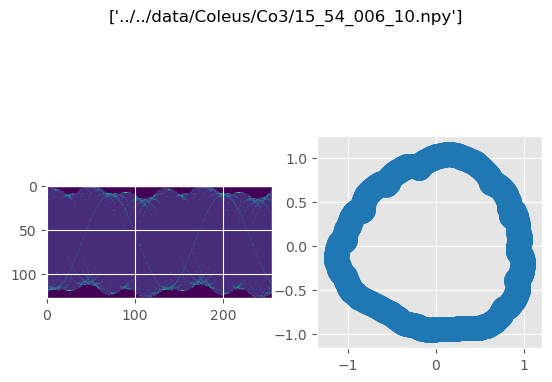

In [9]:
from CNN_execution import compute_ect, find_numpy_files
from matplotlib import pyplot as plt
import numpy as np
from ect import EmbeddedGraph

files = find_numpy_files("../../data/")
file = np.random.choice( files, 1 )
class_name = file[0].split()

fig = plt.figure(  )
fig.suptitle( class_name )
axes = fig.subplots(1,2)
ax = axes[0]
name, data = compute_ect( "whatever", file[0], 128, 128 )
ax.imshow( np.concatenate( (data.T,data.T), 1 ) )
ax = axes[1]
G = EmbeddedGraph()
data = np.load( file[0] )
[ G.add_node( i, x,y ) for i, (x,y) in enumerate(data) ]
[ G.add_edge( j-1, j ) for j in range(1, len(data)) ]
G.plot(ax=ax)
[ l.set_linewidth(0.5) for l in ax.lines ]
[ m.set_linewidth(0.5) for m in ax.collections ]
[ t.set_visible(False) for t in ax.texts]
plt.show()


In [6]:
open("js_html.html", "w" ).write( js_html )

1061015